In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import pandas as pd
import numpy as np

# Step 1: Load CSV Data
df = pd.read_csv('/Users/Nufail/Desktop/Process_Mining/Process_Mining/conformance_checking/data/df_for_decision_tree.csv')

In [3]:
df.head()

,trace_number,start_log_moves,start_model_moves,A-Create-Application_log_moves,A-Create-Application_model_moves,A-Submitted_log_moves,A-Submitted_model_moves,W-Handle-leads-schedule_log_moves,W-Handle-leads-schedule_model_moves,W-Handle-leads-withdraw_log_moves,...,W-Handle-leads-ate-abort_model_moves,W-Shortened-completion-schedule_log_moves,W-Shortened-completion-schedule_model_moves,W-Shortened-completion-start_log_moves,W-Shortened-completion-start_model_moves,W-Shortened-completion-suspend_log_moves,W-Shortened-completion-suspend_model_moves,W-Call-after-offers-withdraw_log_moves,W-Call-after-offers-withdraw_model_moves,case:throughput_time
0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13 days 15:06:16.631000
1,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30 days 04:47:52.288000
2,2,0,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16 days 02:13:02.807000
3,3,0,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21 days 20:18:42.905000
4,4,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20 days 02:25:54.292000


In [25]:
df.shape

(3093, 112)

In [9]:
type(df['case:throughput_time'])

pandas.core.series.Series

# Set Up Decision tree param

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import tree
import matplotlib.pyplot as plt
import json



# Fill NaN values with -1 to indicate actions that did not appear in the trace
df_filled = df.fillna(-1)

# Exclude unnecessary columns (trace number and "None" moves)
columns_to_exclude = ["trace_number", "None_log_moves", "None_model_moves"]
X = df_filled.drop(columns=columns_to_exclude + ["case:throughput_time"])
y = df_filled["case:throughput_time"]  # We'll convert this to hours later

# Step 3: Convert 'case:throughput_time' to numeric (hours) for modeling
# Ensure 'case:throughput_time' is in timedelta format
y_timedelta = pd.to_timedelta(y)
y_hours = y_timedelta.apply(lambda x: x.total_seconds() / 3600)  # Convert timedelta to hours

# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_hours, test_size=0.2, random_state=42)

# Step 5: Define a function to load parameter grid from a JSON file
def load_param_grid(json_file_path: str) -> dict:
    """
    Loads the parameter grid for GridSearchCV from a JSON file.

    Parameters
    ----------
    json_file_path : str
        The path to the JSON file containing the parameter grid.

    Returns
    -------
    dict
        The parameter grid dictionary.
    """
    with open(json_file_path, 'r') as file:
        param_grid = json.load(file)
    return param_grid

# Load the parameter grid from a JSON file
param_grid_path = 'param_grid.json'  # Replace with the actual path to your JSON file
param_grid = load_param_grid(param_grid_path)

# Define the Decision Tree model with restricted hyperparameters for interpretability
tree_regressor = DecisionTreeRegressor(random_state=42)

# Step 7: Perform Grid Search with Cross-Validation using the loaded param_grid
grid_search = GridSearchCV(
    estimator=tree_regressor,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2
)
grid_search.fit(X_train, y_train)

print("Best Parameters found in Grid Search:", grid_search.best_params_)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=60; total time=   0.0s
[CV] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=60; total time=   0.0s
[CV] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=60; total time=   0.0s
[CV] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=60; total time=   0.0s
[CV] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=60; total time=   0.1s
[CV] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=80; total time=   0.0s
[CV] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=80; total time=   0.0s
[CV] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=80; total time=   0.1s
[CV] END max_depth=3, max_features=5, min_samples_leaf=40, min_samples_split=100; total time=   0.0s
[CV] END max_depth=3, max_features=5,

# See best tree

Model Performance:
Best Parameters: {'max_depth': 5, 'max_features': 12, 'min_samples_leaf': 50, 'min_samples_split': 60}
Mean Absolute Error (MAE): 163.14 hours
Root Mean Squared Error (RMSE): 234.49 hours
R-squared (R2): 0.17
  Actual Throughput Time (Hours) Predicted Throughput Time (Hours)
0     20 days 00:56:41.258000400        15 days 14:01:44.561809200
1     41 days 08:53:06.929998800        16 days 06:42:27.698896800
2      8 days 11:57:34.908998400        17 days 18:20:31.059146400
3     21 days 18:28:18.203998800        17 days 09:39:03.999135600
4      0 days 00:57:59.281999200         6 days 19:27:58.216856400


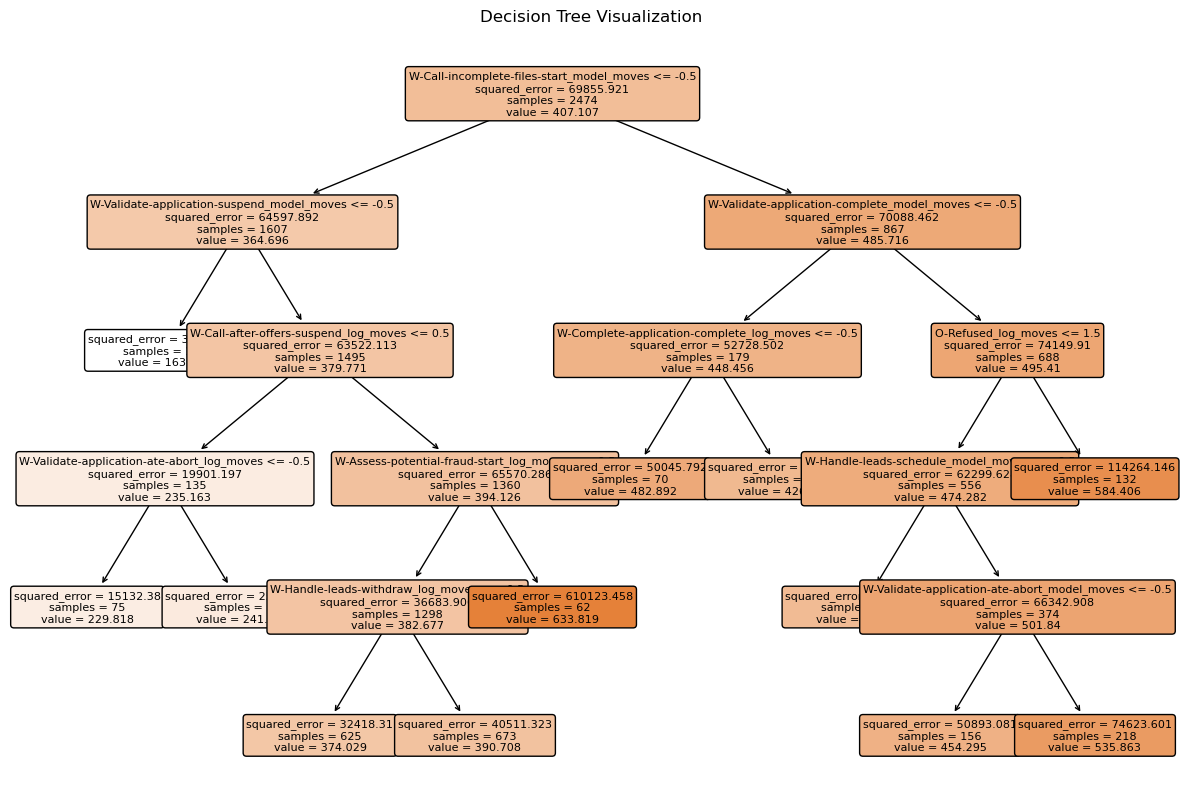

In [13]:

# Extract the best model from the grid search
best_tree_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_hours = best_tree_model.predict(X_test)

# Convert predictions back to timedelta format for interpretation
y_pred_timedelta = pd.Series(y_pred_hours).apply(lambda hours: pd.to_timedelta(hours, unit='h'))
y_test_timedelta = pd.Series(y_test).apply(lambda hours: pd.to_timedelta(hours, unit='h'))

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_hours)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_hours))
r2 = r2_score(y_test, y_pred_hours)

print("Model Performance:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Absolute Error (MAE): {mae:.2f} hours")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} hours")
print(f"R-squared (R2): {r2:.2f}")

# Display first few results for interpretation
results_df = pd.DataFrame({
    'Actual Throughput Time (Hours)': y_test_timedelta.reset_index(drop=True),
    'Predicted Throughput Time (Hours)': y_pred_timedelta
})
print(results_df.head())

# Visualize the decision tree to understand decision rules
plt.figure(figsize=(15, 10))
tree.plot_tree(best_tree_model, feature_names=X.columns, filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree Visualization")
plt.show()

# Get Rules

In [17]:
from typing import List, Dict, Tuple
import pandas as pd
from sklearn.tree import _tree

def extract_rules_from_tree(decision_tree_model, feature_names: List[str], target_name: str) -> List[Dict[str, any]]:
    """
    Extract rules by traversing from the root to each leaf in the trained decision tree model.
    
    Parameters
    ----------
    decision_tree_model : sklearn.tree.DecisionTreeRegressor
        The trained decision tree model from which to extract path-based rules.
    feature_names : List[str]
        List of feature names to interpret tree splits.
    target_name : str
        The name of the target variable, for leaf-level output interpretation.
        
    Returns
    -------
    List[Dict[str, any]]
        A list of dictionaries, each representing a rule with:
            - 'conditions': List of conditions (feature, operator, threshold) for the path.
            - 'average_gini': Average Gini impurity encountered along the path.
            - 'final_gini': Gini impurity at the leaf node.
            - 'average_throughput_time': Average value of target (throughput time) at the leaf node.
    """
    tree_ = decision_tree_model.tree_
    rules = []

    def traverse(node: int, conditions: List[Tuple[str, str, float]], gini_values: List[float]):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:  # Not a leaf node
            # Extract feature name and threshold
            feature = feature_names[tree_.feature[node]]
            threshold = tree_.threshold[node]
            gini = tree_.impurity[node]

            # Traverse left (feature <= threshold)
            left_conditions = conditions + [(feature, "<=", threshold)]
            traverse(tree_.children_left[node], left_conditions, gini_values + [gini])

            # Traverse right (feature > threshold)
            right_conditions = conditions + [(feature, ">", threshold)]
            traverse(tree_.children_right[node], right_conditions, gini_values + [gini])
        
        else:
            # Leaf node, create a rule
            final_gini = tree_.impurity[node]
            avg_gini = sum(gini_values) / len(gini_values) if gini_values else final_gini
            avg_throughput_time = tree_.value[node][0][0]  # Mean target value at leaf
            
            rule = {
                'conditions': conditions,
                'average_gini': avg_gini,
                'final_gini': final_gini,
                'average_throughput_time': avg_throughput_time
            }
            rules.append(rule)

    # Start traversal from the root node
    traverse(0, [], [])
    return rules


In [29]:
def split_log_by_rules_with_labels(log_df: pd.DataFrame, rules: List[Dict[str, any]]) -> Dict[str, pd.DataFrame]:
    """
    Split the log into segments based on the full path rules (root to leaf) 
    and label each trace with the rule it matches. Include a separate segment for unmatched traces.

    Parameters
    ----------
    log_df : pd.DataFrame
        The original event log data.
    rules : List[Dict[str, any]]
        Extracted path-based rules from the decision tree, where each rule includes:
            - conditions: List of conditions (feature, operator, threshold).
            - average_gini: Average Gini impurity along the path.
            - final_gini: Gini impurity at the leaf.
            - average_throughput_time: Average throughput time at the leaf node.

    Returns
    -------
    Dict[str, pd.DataFrame]
        A dictionary containing:
            - Segments for traces matching each rule (labeled by rule index, starting from 1).
            - A segment for unmatched traces under the key "unmatched".
    """
    log_with_labels = log_df.copy()
    log_with_labels['rule_index'] = -1  # Default to -1 for unmatched traces

    segments = {}

    for rule_idx, rule in enumerate(rules, start=1):  # Start counting rules from 1
        rule_filter = pd.Series([True] * len(log_df))  # Start with all True

        for feature, op, threshold in rule['conditions']:
            if op == "<=":
                rule_filter &= (log_df[feature] <= threshold)
            elif op == ">":
                rule_filter &= (log_df[feature] > threshold)
            else:
                raise ValueError(f"Unsupported operator '{op}' in rule.")
        
        # Apply the rule filter and label matching traces
        matched_traces = log_with_labels[rule_filter].copy()
        if not matched_traces.empty:
            matched_traces['rule_index'] = rule_idx
            segments[f"Segment {rule_idx}"] = matched_traces
            print(f"Segment {rule_idx} created with {len(matched_traces)} traces (matches Rule {rule_idx}).")
        else:
            print(f"Rule {rule_idx} did not match any traces.")

        # Update the main DataFrame with rule labels
        log_with_labels.loc[rule_filter, 'rule_index'] = rule_idx

    # Handle unmatched traces
    unmatched_traces = log_with_labels[log_with_labels['rule_index'] == -1]
    if not unmatched_traces.empty:
        segments["unmatched"] = unmatched_traces
        print(f"Unmatched Segment created with {len(unmatched_traces)} traces.")

    return segments


In [18]:
# Extract rules from the decision tree model
feature_names = X.columns  # Features used for training
rules = extract_rules_from_tree(best_tree_model, feature_names, target_name="case:throughput_time")

# Print extracted rules for inspection
print("Extracted Rules:")
for idx, rule in enumerate(rules, 1):
    print(f"Rule {idx}:")
    print("Conditions:")
    for feature, operator, threshold in rule['conditions']:
        print(f"  - {feature} {operator} {threshold}")
    print(f"  Average Gini Impurity Along Path: {rule['average_gini']:.4f}")
    print(f"  Final Gini Impurity at Leaf: {rule['final_gini']:.4f}")
    print(f"  Average Throughput Time (Hours): {rule['average_throughput_time']:.2f}\n")


Extracted Rules:
Rule 1:
Conditions:
  - W-Call-incomplete-files-start_model_moves <= -0.5
  - W-Validate-application-suspend_model_moves <= -0.5
  Average Gini Impurity Along Path: 67226.9067
  Final Gini Impurity at Leaf: 35430.5768
  Average Throughput Time (Hours): 163.47

Rule 2:
Conditions:
  - W-Call-incomplete-files-start_model_moves <= -0.5
  - W-Validate-application-suspend_model_moves > -0.5
  - W-Call-after-offers-suspend_log_moves <= 0.5
  - W-Validate-application-ate-abort_log_moves <= -0.5
  Average Gini Impurity Along Path: 54469.2809
  Final Gini Impurity at Leaf: 15132.3800
  Average Throughput Time (Hours): 229.82

Rule 3:
Conditions:
  - W-Call-incomplete-files-start_model_moves <= -0.5
  - W-Validate-application-suspend_model_moves > -0.5
  - W-Call-after-offers-suspend_log_moves <= 0.5
  - W-Validate-application-ate-abort_log_moves > -0.5
  Average Gini Impurity Along Path: 54469.2809
  Final Gini Impurity at Leaf: 25781.8912
  Average Throughput Time (Hours): 241

## Segment Event log

In [30]:
# Segment the log based on the extracted rules
segmented_logs = split_log_by_rules_with_labels(df_filled, rules)


Segment 1 created with 139 traces (matches Rule 1).
Segment 2 created with 96 traces (matches Rule 2).
Segment 3 created with 74 traces (matches Rule 3).
Segment 4 created with 790 traces (matches Rule 4).
Segment 5 created with 866 traces (matches Rule 5).
Segment 6 created with 77 traces (matches Rule 6).
Segment 7 created with 75 traces (matches Rule 7).
Segment 8 created with 135 traces (matches Rule 8).
Segment 9 created with 227 traces (matches Rule 9).
Segment 10 created with 190 traces (matches Rule 10).
Segment 11 created with 256 traces (matches Rule 11).
Segment 12 created with 168 traces (matches Rule 12).


# Synthetic Event Logs

In [4]:
from pm4py.objects.petri_net.importer import importer as pnml_importer

petri_net, initial_marking, final_marking = pnml_importer.apply('/Users/Nufail/Desktop/Process_Mining/Process_Mining/conformance_checking/data/BPI2017Denied_petriNet.pnml')

In [5]:
petri_net

places: [ n1, n10, n11, n12, n13, n14, n15, n16, n17, n18, n19, n2, n20, n21, n22, n23, n24, n25, n26, n27, n28, n29, n3, n30, n31, n32, n33, n34, n35, n36, n37, n38, n39, n4, n40, n41, n42, n43, n44, n45, n46, n47, n48, n49, n5, n50, n51, n52, n53, n54, n55, n56, n57, n58, n59, n6, n60, n61, n62, n63, n64, n65, n66, n67, n7, n8, n9 ]
transitions: [ (n100, 'O-Cancelled'), (n101, 'O-Create-Offer'), (n102, None), (n103, None), (n104, 'O-Created'), (n105, 'O-Sent-mail-and-online'), (n106, 'W-Complete-application-ate-abort'), (n107, 'W-Complete-application-complete'), (n108, 'W-Call-after-offers-schedule'), (n109, 'W-Call-after-offers-start'), (n110, 'A-Complete'), (n111, None), (n112, None), (n113, 'W-Call-after-offers-suspend'), (n114, 'W-Call-after-offers-resume'), (n115, 'W-Call-after-offers-ate-abort'), (n116, None), (n117, 'W-Call-after-offers-complete'), (n118, 'W-Call-after-offers-withdraw'), (n119, 'A-Denied'), (n120, 'O-Refused'), (n121, 'O-Returned'), (n122, 'W-Validate-applicat

In [6]:
import pm4py

synth_log = pm4py.sim.play_out(petri_net, initial_marking, final_marking)

In [7]:
# Generate synthetic event log from the Petri net
synth_log = pm4py.sim.play_out(petri_net, initial_marking, final_marking)

# Convert synthetic log to Pandas DataFrame
log_data = []
for trace in synth_log:
    trace_id = trace.attributes['concept:name']  # Access attributes as object properties
    for event in trace:
        log_data.append({
            'trace_id': trace_id,
            'activity': event['concept:name'],  # Event attributes are accessed this way
            'timestamp': event['time:timestamp']
        })

# Create a DataFrame for the synthetic event log
synth_log_df = pd.DataFrame(log_data)


In [8]:

# Display the first few rows
synth_log_df[synth_log_df['trace_id'] == 1]

,trace_id,activity,timestamp


In [8]:
ldld = synth_log_df[synth_log_df['trace_id'] == '1']
ldld

,trace_id,activity,timestamp
27,1,start,1970-04-26 18:47:07+00:00
28,1,A-Create-Application,1970-04-26 18:47:08+00:00
29,1,A-Concept,1970-04-26 18:47:09+00:00
30,1,W-Complete-application-schedule,1970-04-26 18:47:10+00:00
31,1,W-Complete-application-start,1970-04-26 18:47:11+00:00
32,1,W-Shortened-completion-schedule,1970-04-26 18:47:12+00:00
33,1,W-Shortened-completion-start,1970-04-26 18:47:13+00:00
34,1,W-Complete-application-suspend,1970-04-26 18:47:14+00:00
35,1,A-Accepted,1970-04-26 18:47:15+00:00
36,1,O-Create-Offer,1970-04-26 18:47:16+00:00


In [12]:
import pandas as pd
import random
from datetime import timedelta

def adjust_timestamps(df, trace_column='trace_id', timestamp_column='timestamp', min_increment=30, max_increment=6000):
    """
    Adjust timestamps within each trace to add realistic time differences while maintaining chronological order.
    
    Parameters
    ----------
    df : pd.DataFrame
        The event log DataFrame containing traces with activities and timestamps.
    trace_column : str
        The column name representing trace identifiers.
    timestamp_column : str
        The column name representing activity timestamps.
    min_increment : int
        Minimum increment (in seconds) between consecutive activities.
    max_increment : int
        Maximum increment (in seconds) between consecutive activities.
        
    Returns
    -------
    pd.DataFrame
        The updated DataFrame with adjusted timestamps.
    """
    # Copy the DataFrame to avoid modifying the original data
    df = df.copy()
    
    # Convert timestamps to pandas datetime if not already
    df[timestamp_column] = pd.to_datetime(df[timestamp_column], utc=True)
    
    # Group by trace and process each trace
    for trace_id, group in df.groupby(trace_column):
        # Sort the group by timestamp to ensure order
        group = group.sort_values(by=timestamp_column)
        adjusted_timestamps = []
        current_time = group.iloc[0][timestamp_column]  # Start with the first timestamp
        
        # Generate adjusted timestamps for the trace
        for _ in range(len(group)):
            adjusted_timestamps.append(current_time)
            # Increment the current time by a random value within the range
            increment = timedelta(seconds=random.randint(min_increment, max_increment))
            current_time += increment
        
        # Update the original DataFrame with adjusted timestamps
        df.loc[group.index, timestamp_column] = adjusted_timestamps

    return df

# Example of how to use this function (replace 'synth_log_df' with your actual DataFrame variable name)
# Updated timestamps
synth_log_df_adjusted = adjust_timestamps(synth_log_df, trace_column='trace_id', timestamp_column='timestamp')



In [13]:
synth_log_df_adjusted[synth_log_df_adjusted['trace_id'] == '1']


,trace_id,activity,timestamp
27,1,start,1970-04-26 18:47:07+00:00
28,1,A-Create-Application,1970-04-26 19:37:26+00:00
29,1,A-Concept,1970-04-26 20:34:18+00:00
30,1,W-Complete-application-schedule,1970-04-26 21:59:27+00:00
31,1,W-Complete-application-start,1970-04-26 22:25:35+00:00
32,1,W-Shortened-completion-schedule,1970-04-26 23:47:46+00:00
33,1,W-Shortened-completion-start,1970-04-27 00:57:05+00:00
34,1,W-Complete-application-suspend,1970-04-27 01:43:39+00:00
35,1,A-Accepted,1970-04-27 01:48:37+00:00
36,1,O-Create-Offer,1970-04-27 02:42:10+00:00


In [12]:
# Group and count unique activities
activity_counts = synth_log_df['activity'].value_counts().reset_index()

# Rename columns for clarity
activity_counts.columns = ['activity', 'count']

# Display the resulting dataframe
activity_counts


,activity,count
0,W-Call-incomplete-files-suspend,1735
1,W-Complete-application-suspend,1031
2,W-Assess-potential-fraud-suspend,1011
3,start,1000
4,A-Create-Application,1000
5,end,1000
6,W-Call-incomplete-files-schedule,869
7,W-Call-incomplete-files-start,869
8,A-Incomplete,869
9,W-Call-incomplete-files-ate-abort,869


In [14]:
import pandas as pd
import numpy as np

def introduce_synthetic_deviations(log_df: pd.DataFrame, activities_to_skip: list, deviation_ratio: float = 0.3, 
                                   time_reduction_range: tuple = (1, 6), seed: int = 42) -> pd.DataFrame:
    """
    Introduces synthetic deviations by skipping user-specified activities in a subset of traces.
    
    Parameters
    ----------
    log_df : pd.DataFrame
        The synthetic event log as a DataFrame with columns ['trace_id', 'activity', 'timestamp'].
    activities_to_skip : list
        List of activities to skip (remove) from traces.
    deviation_ratio : float, optional
        The ratio of traces containing the specified activity to modify (default is 0.3, i.e., 30%).
    time_reduction_range : tuple, optional
        Range of time (in hours) to reduce for subsequent events (default is (1, 6)).
    seed : int, optional
        Random seed for reproducibility (default is 42).
    
    Returns
    -------
    pd.DataFrame
        A modified event log with synthetic deviations introduced.
    """
    np.random.seed(seed)
    modified_log = log_df.copy()
    
    for activity in activities_to_skip:
        # Identify traces containing the activity
        traces_with_activity = modified_log[modified_log['activity'] == activity]['trace_id'].unique()
        
        # Randomly select 30% of these traces
        num_traces_to_modify = int(len(traces_with_activity) * deviation_ratio)
        traces_to_modify = np.random.choice(traces_with_activity, num_traces_to_modify, replace=False)
        
        for trace_id in traces_to_modify:
            # Filter the trace
            trace = modified_log[modified_log['trace_id'] == trace_id].copy()
            
            # Remove all occurrences of the activity
            trace = trace[trace['activity'] != activity]
            
            # Generate a random time reduction
            time_reduction = pd.Timedelta(hours=np.random.uniform(*time_reduction_range))
            
            # Adjust timestamps of subsequent events
            if not trace.empty:
                # Get the timestamp of the last remaining activity
                last_timestamp = trace.iloc[-1]['timestamp']
                
                # Adjust timestamps for subsequent events
                trace.loc[trace.index[1]:, 'timestamp'] -= time_reduction
            
            # Replace the original trace with the modified trace in the log
            modified_log = modified_log[modified_log['trace_id'] != trace_id]
            modified_log = pd.concat([modified_log, trace])
    
    # Sort the modified log by trace_id and timestamp
    modified_log = modified_log.sort_values(by=['trace_id', 'timestamp']).reset_index(drop=True)
    return modified_log


In [69]:
import pandas as pd
import numpy as np

def introduce_synthetic_deviations_W(
    log_df: pd.DataFrame,
    activities_to_skip: list,
    deviation_ratio: float = 0.3,
    time_reduction_range: tuple = (3600, 10800),  # Time reduction range in seconds
    seed: int = 42
) -> pd.DataFrame:
    """
    Introduces synthetic deviations by skipping user-specified activities in a subset of traces.

    Parameters
    ----------
    log_df : pd.DataFrame
        The synthetic event log as a DataFrame with columns ['trace_id', 'activity', 'timestamp'].
    activities_to_skip : list
        List of activities to skip (remove) from traces.
    deviation_ratio : float, optional
        The ratio of traces containing the specified activity to modify (default is 0.3, i.e., 30%).
    time_reduction_range : tuple, optional
        Range of time (in seconds) to reduce for subsequent events (default is (60, 3600)).
    seed : int, optional
        Random seed for reproducibility (default is 42).

    Returns
    -------
    pd.DataFrame
        A modified event log with synthetic deviations introduced.
    """
    np.random.seed(seed)
    modified_log = log_df.copy()

    for activity in activities_to_skip:
        # Identify traces containing the activity
        traces_with_activity = modified_log[modified_log['activity'] == activity]['trace_id'].unique()

        # Randomly select traces to modify based on the deviation ratio
        num_traces_to_modify = int(len(traces_with_activity) * deviation_ratio)
        traces_to_modify = np.random.choice(traces_with_activity, num_traces_to_modify, replace=False)

        for trace_id in traces_to_modify:
            # Filter the trace
            trace = modified_log[modified_log['trace_id'] == trace_id].copy()

            # Find indices of activities to be removed
            indices_to_remove = trace[trace['activity'] == activity].index

            # Determine the first affected index
            first_affected_index = indices_to_remove.min()

            # Remove all occurrences of the activity
            trace = trace.drop(indices_to_remove)

            # Generate a random time reduction in seconds
            time_reduction = pd.Timedelta(seconds=np.random.uniform(*time_reduction_range))

            # Adjust timestamps for activities after the last removed activity
            if not trace.empty and first_affected_index is not None:
                # Identify indices of events following the removed activities
                subsequent_indices = trace.index[trace.index > first_affected_index]

                # Adjust their timestamps
                trace.loc[subsequent_indices, 'timestamp'] -= time_reduction

            # Replace the trace in the modified log
            modified_log = modified_log[modified_log['trace_id'] != trace_id]
            modified_log = pd.concat([modified_log, trace])

    # Sort the modified log by trace_id and timestamp
    modified_log = modified_log.sort_values(by=['trace_id', 'timestamp']).reset_index(drop=True)
    return modified_log


In [72]:
# Example usage
synthetic_log_deviat = introduce_synthetic_deviations_W(
    log_df=synth_log_df_adjusted,
    activities_to_skip=['W-Call-incomplete-files-resume', 'W-Call-incomplete-files-suspend'],
    deviation_ratio=1,
    time_reduction_range=(3600, 10800),
    seed=42
)


In [73]:
synthetic_log_deviat[synthetic_log_deviat['trace_id'] == '1']




,trace_id,activity,timestamp
27,1,start,1970-04-26 18:47:07+00:00
28,1,A-Create-Application,1970-04-26 19:37:26+00:00
29,1,A-Concept,1970-04-26 20:34:18+00:00
30,1,W-Complete-application-schedule,1970-04-26 21:59:27+00:00
31,1,W-Complete-application-start,1970-04-26 22:25:35+00:00
32,1,W-Shortened-completion-schedule,1970-04-26 23:47:46+00:00
33,1,W-Shortened-completion-start,1970-04-27 00:57:05+00:00
34,1,W-Complete-application-suspend,1970-04-27 01:43:39+00:00
35,1,A-Accepted,1970-04-27 01:48:37+00:00
36,1,O-Create-Offer,1970-04-27 02:42:10+00:00


## creating csv file of synthetic data

In [120]:
# Example usage
synthetic_log_deviat_test = introduce_synthetic_deviations_W(
    log_df=synth_log_df_adjusted,
    activities_to_skip=['W-Call-incomplete-files-resume', 'W-Call-incomplete-files-suspend'],
    deviation_ratio=0.8,
    time_reduction_range=(3600, 10800),
    seed=42
)

In [121]:
synthetic_log_deviat_test = synthetic_log_deviat_test.rename(
    columns={
        'trace_id': 'case:concept:name',
        'activity': 'concept:name',
        'timestamp': 'time:timestamp'
    }
)

In [122]:
synthetic_log_deviat_test['time:timestamp'] = pd.to_datetime(synthetic_log_deviat_test['time:timestamp'])

In [104]:
from pm4py.objects.petri_net.importer import importer as pnml_importer

petri_net, initial_marking, final_marking = pnml_importer.apply('/Users/Nufail/Desktop/Process_Mining/Process_Mining/conformance_checking/data/BPI2017Denied_petriNet.pnml')

In [124]:
alignments = pm4py.algo.conformance.alignments.petri_net.algorithm.apply_log(log=synthetic_log_deviat_test,
                                                                             petri_net=petri_net,
                                                                             initial_marking=initial_marking,
                                                                             final_marking=final_marking)


aligning log, completed variants :: 100%|██████████| 604/604 [01:11<00:00,  8.40it/s]


In [95]:
from typing import List, Dict, Tuple, Optional

def clean_alignments(alignments: List):
    """
    Cleans the alignment data by replacing None values with the tau symbol (τ).

    Parameters
    ----------
    - alignments (List): A list of alignment results where each trace containts the alignment of activities between the log and PetriNet
    
    Returns
    ----------
    :List[Dict[str,List[Tuple[Optional[str],Optional[str]]]]]: The alignments that was loaded from the file.
    """
    # Initialize tau symbol 
    tau_symbol = '\u03c4'
    
    for trace in alignments:
        for i, (log_activity, model_activity) in enumerate(trace['alignment']):
            # Check if an activity is None and replace it with the tau symbol
            if log_activity is None:
                trace['alignment'][i] = (tau_symbol, model_activity)
            elif model_activity is None:
                trace['alignment'][i] = (log_activity, tau_symbol)
    
    return alignments


In [106]:
cleaned_alignments = clean_alignments(alignments)

In [115]:

def generate_trace_encoding(alignments: List):
    """
    Load alignments from a file using pickle.

    Parameters
    ----------
    - alignments (List): A list of alignment results where each trace containts the alignment of activities between the log and PetriNet
    
    Returns
    ----------
    List[Dict[str, Dict[str, int]]]: A list where each element corresponds to a trace. Each trace is represented by a dictionary where the keys are the activity names and the values are dictionaries with the counts of 'log_moves' and 'model_moves'
    """
    # Initialize a list to store the move counts for each trace
    move_count_per_trace = []
    
    for trace in alignments:
        # Initialize a dictionary to store move counts for each activity in the current trace
        move_count = {}
        for log_activity, model_activity in trace['alignment']:
            # If the activity is not the '>>' symbol and hasn't been added to the dictionary yet, add it
            if (log_activity != ">>") and (log_activity not in move_count):
                move_count[log_activity] = {'log_moves': 0, 'model_moves': 0}
            elif (model_activity != ">>") and model_activity not in move_count:
                move_count[model_activity] = {'log_moves': 0, 'model_moves': 0}
            
            # Increment the model move count if the log activity is '>>' (indicating a move only in the model)
            if log_activity == ">>":
                move_count[model_activity]['model_moves'] += 1
            # Increment the log move count if the model activity is '>>' (indicating a move only in the log)
            elif model_activity == ">>":
                move_count[log_activity]['log_moves'] += 1
        
        # Add the move count dictionary for the current trace to the list
        move_count_per_trace.append(move_count) 
        
    return move_count_per_trace


In [134]:
trace_encoding = generate_trace_encoding(alignments)

In [123]:
synthetic_log_deviat_test[synthetic_log_deviat_test['case:concept:name'] == '1']


,case:concept:name,concept:name,time:timestamp
27,1,start,1970-04-26 18:47:07+00:00
28,1,A-Create-Application,1970-04-26 19:37:26+00:00
29,1,A-Concept,1970-04-26 20:34:18+00:00
30,1,W-Complete-application-schedule,1970-04-26 21:59:27+00:00
31,1,W-Complete-application-start,1970-04-26 22:25:35+00:00
32,1,W-Shortened-completion-schedule,1970-04-26 23:47:46+00:00
33,1,W-Shortened-completion-start,1970-04-27 00:57:05+00:00
34,1,W-Complete-application-suspend,1970-04-27 01:43:39+00:00
35,1,A-Accepted,1970-04-27 01:48:37+00:00
36,1,O-Create-Offer,1970-04-27 02:42:10+00:00


In [133]:
alignments[1]

{'alignment': [('start', 'start'),
  ('A-Create-Application', 'A-Create-Application'),
  ('>>', None),
  ('>>', None),
  ('A-Concept', 'A-Concept'),
  ('W-Complete-application-schedule', 'W-Complete-application-schedule'),
  ('W-Complete-application-start', 'W-Complete-application-start'),
  ('>>', None),
  ('W-Shortened-completion-schedule', 'W-Shortened-completion-schedule'),
  ('W-Shortened-completion-start', 'W-Shortened-completion-start'),
  ('>>', None),
  ('>>', None),
  ('W-Complete-application-suspend', 'W-Complete-application-suspend'),
  ('>>', None),
  ('>>', None),
  ('A-Accepted', 'A-Accepted'),
  ('>>', None),
  ('>>', None),
  ('O-Create-Offer', 'O-Create-Offer'),
  ('>>', None),
  ('O-Created', 'O-Created'),
  ('O-Sent-mail-and-online', 'O-Sent-mail-and-online'),
  ('>>', None),
  ('W-Complete-application-ate-abort', 'W-Complete-application-ate-abort'),
  ('W-Call-after-offers-schedule', 'W-Call-after-offers-schedule'),
  ('W-Call-after-offers-start', 'W-Call-after-off

In [136]:
trace_encoding[1]

{'start': {'log_moves': 0, 'model_moves': 0},
 'A-Create-Application': {'log_moves': 0, 'model_moves': 0},
 None: {'log_moves': 0, 'model_moves': 23},
 'A-Concept': {'log_moves': 0, 'model_moves': 0},
 'W-Complete-application-schedule': {'log_moves': 0, 'model_moves': 0},
 'W-Complete-application-start': {'log_moves': 0, 'model_moves': 0},
 'W-Shortened-completion-schedule': {'log_moves': 0, 'model_moves': 0},
 'W-Shortened-completion-start': {'log_moves': 0, 'model_moves': 0},
 'W-Complete-application-suspend': {'log_moves': 0, 'model_moves': 0},
 'A-Accepted': {'log_moves': 0, 'model_moves': 0},
 'O-Create-Offer': {'log_moves': 0, 'model_moves': 0},
 'O-Created': {'log_moves': 0, 'model_moves': 0},
 'O-Sent-mail-and-online': {'log_moves': 0, 'model_moves': 0},
 'W-Complete-application-ate-abort': {'log_moves': 0, 'model_moves': 0},
 'W-Call-after-offers-schedule': {'log_moves': 0, 'model_moves': 0},
 'W-Call-after-offers-start': {'log_moves': 0, 'model_moves': 0},
 'A-Complete': {'lo

In [139]:
# Flatten the trace data and convert it to a DataFrame
    flattened_traces = []
    for trace_number, trace in enumerate(move_count_per_trace, start=0):
        # Add trace number to each flattened trace
        flat_trace = {'trace_number': trace_number} 
        for activity, moves in trace.items():
            # Replace spaces with underscores for activity names, they are not None
            if activity is not None: 
                activity = activity.replace(' ', '_')  
            # Add the model moves and log moves for each activity to the trace dictionary.
            flat_trace[f'{activity}_log_moves'] = moves['log_moves']
            flat_trace[f'{activity}_model_moves'] = moves['model_moves']
        flattened_traces.append(flat_trace)

    # Create a DataFrame for the flattened trace data
    df_flattend = pd.DataFrame(flattened_traces)
    
    # Combine the flattened trace data with the throughput time based on the trace number
    df = pd.merge(df_flattend, throughput_time_df, left_on= 'trace_number', right_on= '@@case_index')
    
    # Drop the '@@case_index' column, as it is no longer needed
    df = df.drop('@@case_index', axis=1)

[{'start': {'log_moves': 0, 'model_moves': 0},
  'A-Create-Application': {'log_moves': 0, 'model_moves': 0},
  'A-Submitted': {'log_moves': 0, 'model_moves': 0},
  'W-Handle-leads-schedule': {'log_moves': 0, 'model_moves': 0},
  'W-Handle-leads-withdraw': {'log_moves': 0, 'model_moves': 0},
  None: {'log_moves': 0, 'model_moves': 13},
  'A-Concept': {'log_moves': 0, 'model_moves': 0},
  'W-Complete-application-schedule': {'log_moves': 0, 'model_moves': 0},
  'W-Complete-application-start': {'log_moves': 0, 'model_moves': 0},
  'W-Shortened-completion-schedule': {'log_moves': 0, 'model_moves': 0},
  'W-Shortened-completion-start': {'log_moves': 0, 'model_moves': 0},
  'W-Shortened-completion-suspend': {'log_moves': 0, 'model_moves': 0},
  'A-Accepted': {'log_moves': 0, 'model_moves': 0},
  'W-Complete-application-suspend': {'log_moves': 0, 'model_moves': 0},
  'O-Create-Offer': {'log_moves': 0, 'model_moves': 0},
  'O-Created': {'log_moves': 0, 'model_moves': 0},
  'O-Sent-mail-and-onli